# Author : Anmol Khera

## Task 1: Predicting Scores using Supervised ML

In [69]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
#Importing data using pandas library
data = pd.read_csv('student_scores_task1.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### EDA processing

In [41]:
data.isnull().sum() #checking null values in the dataset

Hours     0
Scores    0
dtype: int64

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [70]:
data.shape #dataset contains 25 rows and 2 columns

(25, 2)

In [44]:
data.describe() #getting statistical information of the data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [45]:
data.duplicated().sum() #checking any duplicated values

0

<AxesSubplot:title={'center':'Student Scores'}, xlabel='Hours', ylabel='Scores'>

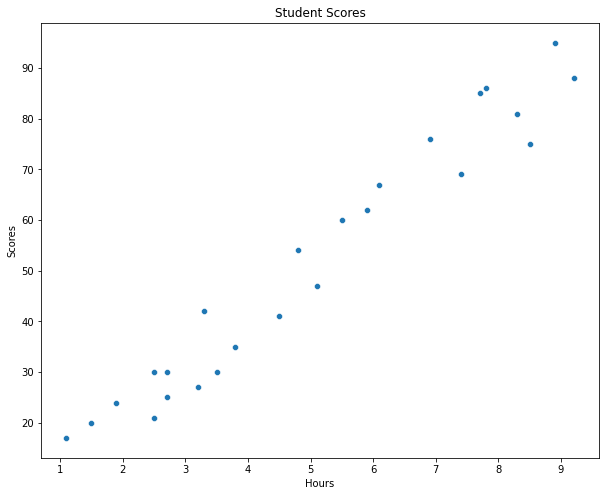

In [46]:
#Visualising Student scores and no. of hours in a scatter plot
plt.figure(figsize=(10,8))
plt.title('Student Scores')
sns.scatterplot(data=data, x='Hours', y='Scores')

#### From the above plot, we can clearly see increase in study hours will lead to increase in scores

### Data Modelling 

In [47]:
#importing linear regression model from sklearn library
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()

In [48]:
lr_model

LinearRegression()

In [49]:
data1=data.copy() #copying dataset for model building

In [50]:
#Defining feature and target variable as x and y
x=data1[['Hours']].values
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [51]:
y=data1[['Scores']].values
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [52]:
print('x contains hours column', x.shape)
print('y contains scores column', y.shape)

x contains hours column (25, 1)
y contains scores column (25, 1)


### Splitting data into train and test

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
#Splitting data according to industry standard ratio i.e, 80%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=1234)

In [55]:
lr_model.fit(x_train,y_train) #training complete

LinearRegression()

In [56]:
#defing coefficient and intercept for best fit line
lr_model.coef_ 

array([[10.01087641]])

In [57]:
lr_model.intercept_

array([2.09534604])

In [58]:
y_pred=lr_model.predict(x_test) #predicting on test data
y_pred

array([[57.15516629],
       [27.12253707],
       [34.13015055],
       [87.18779552],
       [53.15081573]])

In [59]:
#defining the best fir line
best_fit = lr_model.coef_*x + lr_model.intercept_

### Visualising Actual vs Predicted values

C:\Users\anmol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


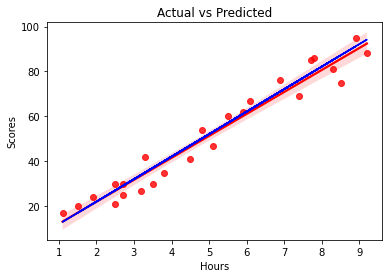

In [71]:
sns.regplot(x, y,  color='red')
plt.plot(x, best_fit, color='blue')
plt.title('Actual vs Predicted')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [65]:
Actual_vs_Predicted= pd.DataFrame({'Actual' : y_test.flatten(), 'Predicted' : y_pred.flatten()})
Actual_vs_Predicted

,Actual,Predicted
0,60,57.155166
1,30,27.122537
2,27,34.130151
3,75,87.187796
4,47,53.150816


### Question : What will be the predicted score if a student studies for 9.25hr/day?

In [72]:
predicted_score= lr_model.predict([[9.25]])
print(predicted_score)


[[94.69595283]]


### Prediction: Student studying for 9.25hrs scores 94%